In [1]:
%matplotlib inline

In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

In [3]:
# Import data into pd Data Frame
# Merge DFs
# Create a bubble chart that shows the avg fare vs the total number of riders
    # bubble size = number of divers for each city type
# Determine mean, median, mode for
    # total number of rides per city type
    # Avg fares for each city type
    # Total number of drivers for each city type
# Create box and whisker plots to determine outliers in
    # Number of rides for each city type
    # fares for each city type
    # number of drivers for each city type
# Create a pie chart for each city type for
    # Percent of total fares
    # Percent of total rides
    # Percent of total drivers
    

In [4]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [5]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178
4,South Jack,3/6/2019 4:28,34.58,3908451377344
5,South Latoya,3/11/2019 12:26,9.52,1994999424437
6,New Paulville,2/27/2019 11:17,43.25,793208410091
7,Simpsonburgh,4/26/2019 0:43,35.98,111953927754
8,South Karenland,1/8/2019 3:28,35.09,7995623208694
9,North Jasmine,3/9/2019 6:26,42.81,5327642267789


In [7]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [8]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [9]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
# get the unique values of the type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
sum(city_data_df['type'] == 'Urban')

66

In [12]:
sum(city_data_df['type'] == 'Suburban')

36

In [13]:
sum(city_data_df['type'] == 'Rural')

18

In [14]:
# Get columns in ride_data_df that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [16]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
# Combine into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = 'left', on = ['city', 'city'])
# Display the data Frame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


In [18]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


In [20]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,1/27/2019 3:08,27.79,6653622887913,11,Suburban
1626,East Kentstad,4/7/2019 19:44,18.75,6575961095852,20,Suburban
1627,Lake Omar,1/17/2019 21:33,21.71,966911700371,22,Suburban
1628,Myersshire,2/27/2019 17:38,17.10,5706770909868,19,Suburban
1629,West Hannah,4/19/2019 1:06,37.78,2273047151891,12,Suburban


In [21]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1076079536213,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1985256326182,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4018025271936,2,Rural


In [23]:
# Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby('city').count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [24]:
# Get the number of rides for suburban cities
suburban_ride_count = suburban_cities_df.groupby('city').count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [25]:
# Get the number of rides for rural cities
rural_ride_count = rural_cities_df.groupby('city').count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [27]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [28]:
# Get average fare for each city in the suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [29]:
# Get average fare for each city in the rural cities.
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [30]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [32]:
# Get the average number of drivers for each suburban and rural city.
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

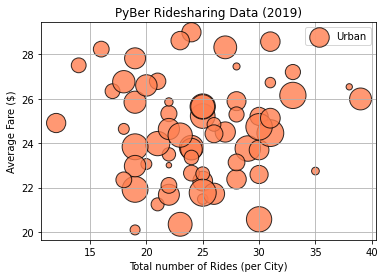

In [37]:
# Create urban bubble plot
plt.scatter(urban_ride_count, urban_avg_fare, s = 10*urban_driver_count, color = 'coral', edgecolor = 'black', linewidths = 1, alpha = 0.8, label = 'Urban')
plt.title('PyBer Ridesharing Data (2019)')
plt.xlabel('Total number of Rides (per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
# Add the legend!
plt.legend()

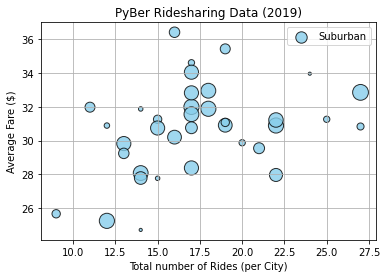

In [38]:
# Create suburban bubble plot
plt.scatter(suburban_ride_count, suburban_avg_fare, s = 10*suburban_driver_count, color = 'skyblue', edgecolor = 'black', linewidths = 1, alpha = 0.8, label = 'Suburban')
plt.title('PyBer Ridesharing Data (2019)')
plt.xlabel('Total number of Rides (per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
# Add the legend!
plt.legend()

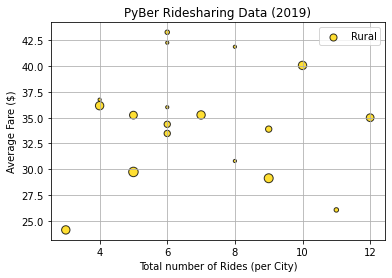

In [39]:
# Create rural bubble plot
plt.scatter(rural_ride_count, rural_avg_fare, s = 10*rural_driver_count, color = 'gold', edgecolor = 'black', linewidths = 1, alpha = 0.8, label = 'Rural')
plt.title('PyBer Ridesharing Data (2019)')
plt.xlabel('Total number of Rides (per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
# Add the legend!
plt.legend()

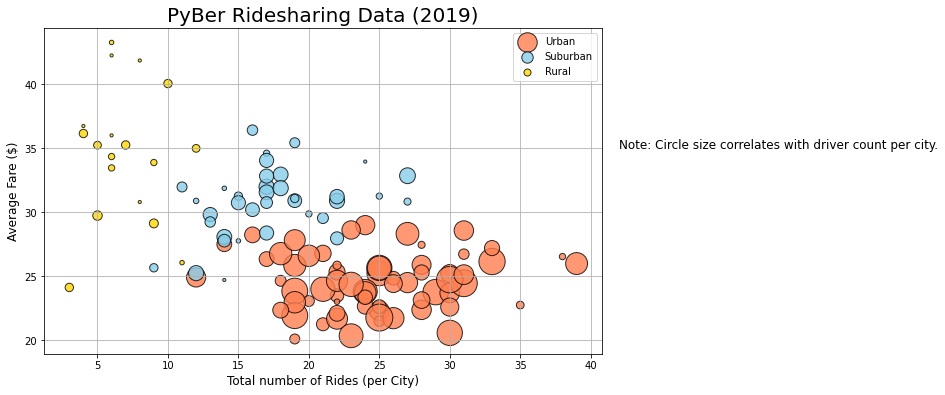

In [43]:
# Combining the graphs
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, urban_avg_fare, s = 10*urban_driver_count, color = 'coral', edgecolor = 'black', linewidths = 1, alpha = 0.8, label = 'Urban')
plt.scatter(suburban_ride_count, suburban_avg_fare, s = 10*suburban_driver_count, color = 'skyblue', edgecolor = 'black', linewidths = 1, alpha = 0.8, label = 'Suburban')
plt.scatter(rural_ride_count, rural_avg_fare, s = 10*rural_driver_count, color = 'gold', edgecolor = 'black', linewidths = 1, alpha = 0.8, label = 'Rural')
plt.title('PyBer Ridesharing Data (2019)', fontsize = 20)
plt.xlabel('Total number of Rides (per City)', fontsize = 12)
plt.ylabel('Average Fare ($)', fontsize = 12)
plt.grid(True)
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Save the figure.
plt.savefig("analysis/Fig1.png")
plt.legend()
plt.show()